### Import libraries and read data

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#input_data_ordered_raw =  pd.read_csv('rnap_scanned_over_ecoli_genome200k.csv')
input_data_ordered_raw = pd.read_csv('GB1.csv')
#sequences = input_data_ordered_raw['seq'].tolist()

In [2]:
input_data_ordered_raw.head()

,seq,val
0,VDGV,0.000000
1,ADGV,-1.062518
2,CDGV,-1.576334
3,DDGV,-1.294319
4,EDGV,-2.779853


In [3]:
sequences = input_data_ordered_raw['seq'][0:100000]
val = input_data_ordered_raw['val'][0:100000]

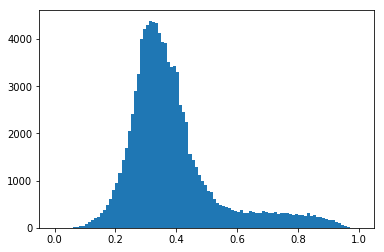

In [4]:
val_norm = (val-min(val))/(max(val)-min(val))
plt.hist(val_norm,bins=100)
plt.show()

In [5]:
len(sequences)

100000

In [6]:
np.random.seed(0)

In [7]:
T = 300
t_max = 15
t_bg = 0.01

size_of_data = 10000
#size_of_data = len(sequences)

input_data_ordered_raw_copy = input_data_ordered_raw[0:size_of_data].copy()

#temp = np.exp(-(np.array(input_data_ordered_raw['val'][0:size_of_data]))/T)/(1+np.exp(-(np.array(input_data_ordered_raw['val'][0:size_of_data]))/T))
#plt.hist(t_max*temp+t_bg,bins=100)
#plt.show()
#np.array(input_data_ordered_raw['val'][0:100000])


### Add transcription column to dataframe

In [8]:
#input_data_ordered_raw_copy['t'] = t_max*temp+t_bg

In [9]:
input_data_ordered_raw_copy.head()

,seq,val
0,VDGV,0.000000
1,ADGV,-1.062518
2,CDGV,-1.576334
3,DDGV,-1.294319
4,EDGV,-2.779853


### Draw read counts according to poission distribution and add to dataframe

In [10]:
input_data_ordered_raw_copy.head(10)

,seq,val
0,VDGV,0.000000
1,ADGV,-1.062518
2,CDGV,-1.576334
3,DDGV,-1.294319
4,EDGV,-2.779853
5,FDGV,-1.126139
6,GDGV,-3.004024
7,HDGV,-3.306464
8,IDGV,-0.012906
9,KDGV,-3.372794


## Split the data into test and train

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#x_train, x_test, y_train, y_test = train_test_split(input_data_ordered_raw_copy['seq'],input_data_ordered_raw_copy['t_norm'],test_size=0.2,random_state=4)
#x_train, x_test, y_train, y_test = train_test_split(input_data_ordered_raw_copy['seq'],input_data_ordered_raw_copy['C'],test_size=0.2)
#x_train, x_test, y_train, y_test = train_test_split(input_data_ordered_raw_copy['seq'],input_data_ordered_raw_copy['val_norm'],test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(sequences,val_norm,test_size=0.2)



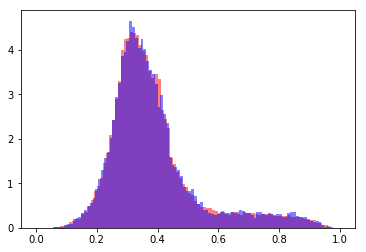

In [13]:
plt.hist(y_train,bins=100,color='r',density=True,alpha=0.5)
plt.hist(y_test,bins=100,color='b',density=True,alpha=0.5)
plt.show()

## One-hot encode the data ... this takes a few minutes

In [14]:
temp_x_train = []
temp_x_test = []

for reshape_index in range(len(x_train)):
    temp_x_train.append(list(np.array(x_train)[reshape_index]))

for reshape_test_index in range(len(x_test)):
    temp_x_test.append(list(np.array(x_test)[reshape_test_index]))
    
x_train = temp_x_train
x_test = temp_x_test

x_train = np.array(x_train)
x_test = np.array(x_test)

In [15]:
x_train[0]

array(['K', 'D', 'P', 'R'], dtype='<U1')

In [16]:
base_dict = {"K":0, "R":1, "H":2, "E":3, "D":4, "N":5, "Q":6, "T":7, "S":8, "C":9, "G":10, "A":11, "V":12, "L":13, "I":14, "M":15, "P":16, "Y":17, "F":18, "W":19}

In [17]:
test_size = len(y_test)

In [18]:
x_train_tensor = np.zeros(list(x_train.shape) + [20])    # shape: (batch_size, 4)
x_test_tensor = np.zeros(list(x_test.shape) + [20])    # shape: (batch_size, 4)
base_dict = {"K":0, "R":1, "H":2, "E":3, "D":4, "N":5, "Q":6, "T":7, "S":8, "C":9, "G":10, "A":11, "V":12, "L":13, "I":14, "M":15, "P":16, "Y":17, "F":18, "W":19}

#base_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
num_sample = len(x_train_tensor)
seq_length = len(x_train[0])
test_size = len(x_test)


#naive one-hot encoding
for row in range(num_sample):
    for col in range(seq_length):
        x_train_tensor[row,col,base_dict[x_train[row,col]]] = 1
        if(row<test_size):
            x_test_tensor[row,col,base_dict[x_test[row,col]]] = 1

In [19]:
print('Training set shape: {}'.format(x_train_tensor.shape))
print('Training set label shape: {}'.format(y_train.shape))

print('Test set shape: {}'.format(x_test_tensor.shape))
print('Test set label shape: {}'.format(y_test.shape))

Training set shape: (80000, 4, 20)
Training set label shape: (80000,)
Test set shape: (20000, 4, 20)
Test set label shape: (20000,)


In [20]:
#REGG
x_train_tensor[0][3]


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [21]:
'''
x_train_flat = []
x_test_flat = []

for flatten_x_train_index in range(len(x_train_tensor)):
    x_train_flat.append(x_train_tensor[flatten_x_train_index].flatten())
    
for flatten_x_test_index in range(len(x_test_tensor)):
    x_test_flat.append(x_test_tensor[flatten_x_test_index].flatten())  

#np.shape(np.array(x_train_flat[0]).reshape(164,1))
x_train_flat = (np.array(x_train_flat).reshape(x_train_tensor.shape[0],x_train_tensor.shape[1]*x_train_tensor.shape[2],1))
x_test_flat = (np.array(x_test_flat).reshape(x_test_tensor.shape[0],x_test_tensor.shape[1]*x_test_tensor.shape[2],1))
'''    

'\nx_train_flat = []\nx_test_flat = []\n\nfor flatten_x_train_index in range(len(x_train_tensor)):\n    x_train_flat.append(x_train_tensor[flatten_x_train_index].flatten())\n    \nfor flatten_x_test_index in range(len(x_test_tensor)):\n    x_test_flat.append(x_test_tensor[flatten_x_test_index].flatten())  \n\n#np.shape(np.array(x_train_flat[0]).reshape(164,1))\nx_train_flat = (np.array(x_train_flat).reshape(x_train_tensor.shape[0],x_train_tensor.shape[1]*x_train_tensor.shape[2],1))\nx_test_flat = (np.array(x_test_flat).reshape(x_test_tensor.shape[0],x_test_tensor.shape[1]*x_test_tensor.shape[2],1))\n'

In [22]:
y_train.shape

(80000,)

In [23]:
y_train = np.array(y_train).reshape(y_train.shape[0],1)

## Custom error metric

In [24]:
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

## Custom Loss

In [69]:
import keras.backend as K
import tensorflow as tf

K.clear_session()

def kullback_leibler_divergence_ammar(y_true, y_pred):
    tf.print(y_true,'tui')
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    return K.sum(y_true * K.log(y_true / y_pred), axis=-1)

In [70]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout 
from keras import regularizers
from keras.optimizers import SGD, Adam, RMSprop

#output_dim = nb_classes = 15 
#input_dim = seq_length
model = Sequential() 
model.add(Flatten())
#model.add(Dense(100, activation='relu',input_shape=(41,4)))
#model.add(Dropout(0.25))
#model.add(Dense(41, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(4, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(20, activation='linear'))
model.add(Dense(1, activation='linear'))
#model.add(Dense(20, activation='tanh'))
model.add(Dense(20, activation='sigmoid'))
#model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
#model.add(Dense(1, activation='tanh'))

#batch_size = 10000 
#nb_epoch = 20

In [71]:
#model.compile(loss='mean_absolute_error',optimizer=Adam(lr=0.00001), metrics=['accuracy'])
#model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.0001), metrics=['mean_absolute_error'])
#model.compile(loss=kullback_leibler_divergence_ammar,optimizer=Adam(lr=0.0001), metrics=['mean_absolute_error'])
model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.0005), metrics=['mean_absolute_error'])

In [72]:
#history = model.fit(x_train_flat, y_train, validation_split=0.2, epochs=25)  # starts training
history = model.fit(x_train_tensor, y_train, validation_split=0.2, epochs=50)  # starts training

Train on 64000 samples, validate on 16000 samples
Epoch 1/50
64000/64000 [==============================] - 2s 31us/step - loss: 0.0420 - mean_absolute_error: 0.1304 - val_loss: 0.0119 - val_mean_absolute_error: 0.0835
Epoch 2/50
64000/64000 [==============================] - 2s 27us/step - loss: 0.0112 - mean_absolute_error: 0.0810 - val_loss: 0.0112 - val_mean_absolute_error: 0.0808
Epoch 3/50
64000/64000 [==============================] - 2s 27us/step - loss: 0.0111 - mean_absolute_error: 0.0803 - val_loss: 0.0112 - val_mean_absolute_error: 0.0803
Epoch 4/50
64000/64000 [==============================] - 2s 27us/step - loss: 0.0111 - mean_absolute_error: 0.0803 - val_loss: 0.0112 - val_mean_absolute_error: 0.0805
Epoch 5/50
64000/64000 [==============================] - 2s 26us/step - loss: 0.0111 - mean_absolute_error: 0.0802 - val_loss: 0.0112 - val_mean_absolute_error: 0.0807
Epoch 6/50
64000/64000 [==============================] - 2s 27us/step - loss: 0.0111 - mean_absolute_err

Epoch 49/50
64000/64000 [==============================] - 2s 25us/step - loss: 0.0075 - mean_absolute_error: 0.0663 - val_loss: 0.0077 - val_mean_absolute_error: 0.0676
Epoch 50/50
64000/64000 [==============================] - 2s 25us/step - loss: 0.0075 - mean_absolute_error: 0.0663 - val_loss: 0.0077 - val_mean_absolute_error: 0.0671


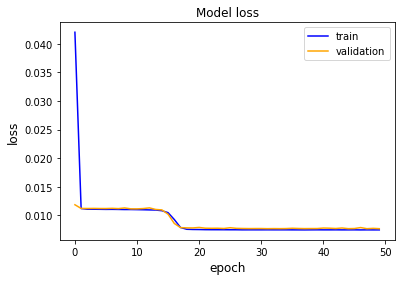

In [73]:
plt.figure()
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='orange')
plt.title('Model loss',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train', 'validation'])
#plt.savefig('Write_up/model_loss.png')
plt.show()

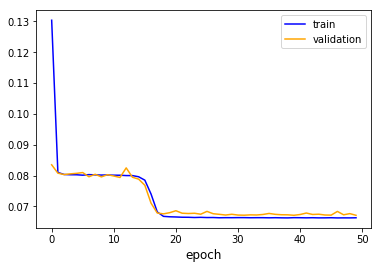

In [74]:
plt.figure()
plt.plot(history.history['mean_absolute_error'],color='blue')
plt.plot(history.history['val_mean_absolute_error'],color='orange')
#plt.title('Model loss',fontsize=12)
#plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train', 'validation'])
#plt.savefig('Write_up/model_loss.png')
plt.show()

In [75]:
'''
plt.figure()
plt.plot(history.history['r_square'],color='blue')
plt.plot(history.history['val_r_square'],color='orange')
#plt.title('Model loss',fontsize=12)
#plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train', 'validation'])
#plt.savefig('Write_up/model_loss.png')
plt.show()
'''

"\nplt.figure()\nplt.plot(history.history['r_square'],color='blue')\nplt.plot(history.history['val_r_square'],color='orange')\n#plt.title('Model loss',fontsize=12)\n#plt.ylabel('loss',fontsize=12)\nplt.xlabel('epoch',fontsize=12)\nplt.legend(['train', 'validation'])\n#plt.savefig('Write_up/model_loss.png')\nplt.show()\n"

In [76]:
#model_prediction = model.predict(x_test_flat)
model_prediction = model.predict(x_test_tensor)

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.layers
get_1st_layer_output = K.function([model.layers[0].input],[model.layers[1].output])
layer_output = get_1st_layer_output([x_test_tensor])

In [79]:
layer_output = np.array(layer_output)
layer_output = layer_output.reshape(20000,1)
np.shape(layer_output)

(20000, 1)

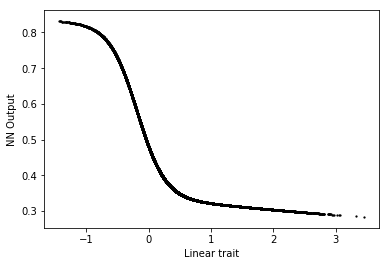

In [80]:
plt.scatter(layer_output,model_prediction,alpha=1.0,s=1.5,color='black')
plt.xlabel('Linear trait')
plt.ylabel('NN Output')
#plt.plot([0,1],color='black',linewidth=3,alpha=0.75)
plt.show()

In [81]:
y_test = np.array(y_test).reshape(-1,1)

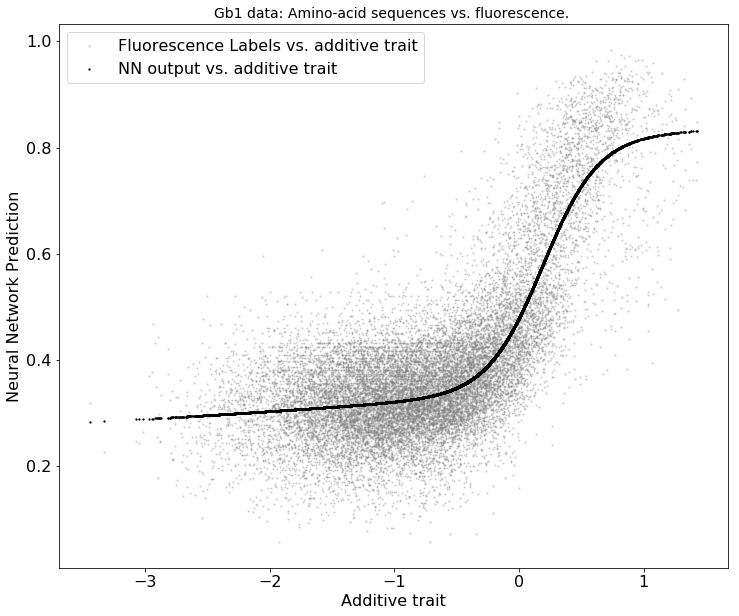

In [108]:
plt.figure
figure_size = [12,10]
plt.figure(figsize=figure_size)
plt.title('Gb1 data: Amino-acid sequences vs. fluorescence. ', fontsize=14)
plt.scatter(-layer_output,y_test,alpha=0.25,s=1.5,color='gray', label='Fluorescence Labels vs. additive trait')
plt.scatter(-layer_output,model_prediction,alpha=1.0,s=1.5,color='black', label='NN output vs. additive trait')
plt.xlabel('Additive trait',fontsize=16)
plt.ylabel('Neural Network Prediction',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=16)

plt.show()

In [109]:
np.savetxt('hidden_layer_out.txt',layer_output)
np.savetxt('test_labels.txt',y_test)
np.savetxt('NN_out.txt',model_prediction)

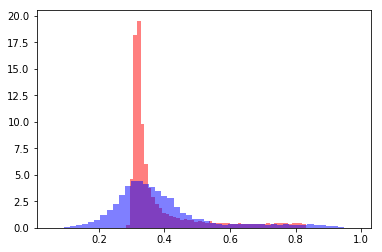

In [83]:
plt.hist(model_prediction,color='r',alpha=0.5,density=True,bins=50)
plt.hist(y_test,color='b',alpha=0.5,density=True,bins=50)
#plt.hist(model_prediction,bins=100,color='b',alpha=0.5)
plt.show()

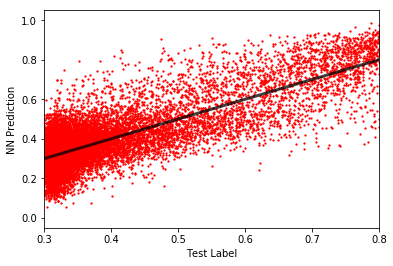

In [84]:
#plt.scatter(y_test,model_prediction,alpha=0.5)
plt.scatter(model_prediction,y_test,alpha=1.0,s=1.5,color='red')
plt.xlabel('Test Label')
plt.ylabel('NN Prediction')
plt.plot([0,1],color='black',linewidth=3,alpha=0.75)
plt.xlim([0.3,0.8])
plt.show()

In [98]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________


In [99]:
from keras.models import load_model

#model.save('NN_GB1.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('ann_delta_g_regression_40k_trian.h5')
#model = load_model('train_90k_test_5k_10_filters_1Convlayer.h5')

In [103]:
model.layers[1].get_weights()[0]
np.savetxt("NN_dense_layer_weights.csv", model.layers[1].get_weights()[0], delimiter=",")

In [ ]:
model_prediction

In [ ]:
predicted_expression = np.exp((-(model_prediction))/T)/(1+np.exp((-(model_prediction))/T))


In [ ]:
predicted_counts = np.random.poisson(7*predicted_expression)
predicted_counts_normed = (predicted_counts-min(predicted_counts))/(max(predicted_counts)-min(predicted_counts))

In [ ]:
plt.hist(predicted_counts,bins=40,color='blue',alpha=0.5,density=True)
plt.hist(C[0:7677],bins=40,color='red',alpha=0.4,density=True)
plt.show()

In [ ]:
np.sum(C[0:7677])

In [ ]:
np.sum(predicted_counts)

In [ ]:
#np.shape(model.layers[1].get_weights()[0])
weights = model.layers[1].get_weights()[0]

In [ ]:
weights = weights.reshape(4,20)

In [ ]:

import seaborn as sns

fig_size = (20, 3)
fig, ax = plt.subplots(figsize=fig_size)
sns.heatmap(weights.T,cmap='RdBu_r')
plt.show()


In [ ]:
import sys
sys.path.insert(0,'/Users/tareen/Desktop/Desktop_Tests/logomaker3')
import logomaker

In [ ]:
base_dict.keys()

In [ ]:
#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)
#learned_filter = pd.DataFrame(weights,columns = ['A','C','G','T'])
learned_filter = pd.DataFrame(weights,columns = ['K', 'R', 'H', 'E', 'D', 'N', 'Q', 'T', 'S', 'C', 'G', 'A', 'V', 'L', 'I', 'M', 'P', 'Y', 'F', 'W'])


import warnings
warnings.filterwarnings("ignore")

baseline_param_dict = {
                          'baseline_width':1.0,
                      }

logo = logomaker.make_logo(
                            #dataframe=learned_filter,
                            dataframe=learned_filter.sub(learned_filter.mean(axis=1), axis=0),
                            #matrix_type='information',
                            remove_flattened_characters=False,
                            ytick_format='%0.1f',
                            draw_now=True,
                            figsize=[12,3],
                            baseline_param_dict = baseline_param_dict,
                            #ylim=[0,0.04]
                    )
print(logo)
plt.xlabel('Position',fontsize=12)
plt.title('NN weights visualized as sequence logo',fontsize=12)
#plt.ylabel('Information (bits)',fontsize=12)
plt.tight_layout()
#plt.savefig('convolution_visualization2.png')
plt.show()


In [ ]:
test_temp = learned_filter-learned_filter.T.values.mean(axis=1)

In [ ]:
learned_filter.values.mean(axis=1)[0]

In [ ]:
learned_filter.loc[0,]

In [ ]:
learned_filter.sub(learned_filter.mean(axis=1), axis=0)

In [ ]:
0.113424-0.1013713

In [ ]:
type(model_prediction)

In [ ]:
model_prediction.shape

In [91]:
import os
os.getcwd()

'/Users/tareen/Desktop/Desktop_Tests/MPathic3/mpathic/data/rnap_convnet/ANN_Logisitc_Regression'

In [ ]:
#ge =  pd.read_csv('y_gb1.csv')

In [ ]:
ge.head()

In [ ]:
plt.scatter(ge['y'],ge['z_10'],alpha=0.5,s=1)
plt.scatter(ge['y'],ge['z_20'],alpha=0.5,s=1)
#plt.scatter(ge['y'],ge['z_20_relu'],alpha=0.5)
plt.scatter(ge['y'],ge['z_41'],alpha=0.5,s=1)
plt.xlabel('Linear Prediction')
plt.ylabel('NN Prediction')
plt.show()

In [ ]:
y_test.shape

In [ ]:
#np.savetxt("linear_model_jellybean_gb1.csv", model_prediction, delimiter=",")

In [ ]:
#np.savetxt("full_model_jellybean_gb1.csv", model_prediction, delimiter=",")

In [ ]:
#np.savetxt("true_y_full.csv", y_test, delimiter=",")

In [ ]:
#np.savetxt("z_gb1_full.csv", model_prediction, delimiter=",")

In [92]:
model

In [97]:
np.shape(model.layers[1].get_weights()[0])

(80, 1)